In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np

from plotnine import *
from mizani.formatters import percent_format
from adjustText import adjust_text

In [3]:
# show FPT balance-sheet-statement here
#  need to have code to show the actual pdf file and the cleaned data that DataCore has acquired. 

In [4]:
# show FPT income-statement here
#  need to have code to show the actual pdf file and the cleaned data that DataCore has acquired. 

In [5]:
# show FPT cash-flow-statement here
#  need to have code to show the actual pdf file and the cleaned data that DataCore has acquired. 

In [6]:
import sqlite3
tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

comp_vn = pd.read_sql_query(
    sql="SELECT * FROM comp_vn",
    con=tidy_finance,
    parse_dates={"datadate"}
)
comp_vn.head(3)

vn30_symbols = [
    "ACB","BCM","BID","BVH","CTG","FPT","GAS","GVR","HDB","HPG",
    "MBB","MSN","MWG","PLX","POW","SAB","SHB","SSB","STB","TCB",
    "TPB","VCB","VHM","VIB","VIC","VJC","VNM","VPB","VRE","EIB"
]

comp_vn30 = comp_vn[comp_vn["symbol"].isin(vn30_symbols)]
comp_vn30.head(3)

,symbol,year,total_current_asset,ca_fin,ca_cce,ca_cash,ca_cash_inbank,ca_cash_attransit,ca_cash_equivalent,ca_fin_invest,...,xsga,xint,oancf,capx,be,op,at_lag,inv,total_debt,selling_general_and_administrative_expenses
11,FPT,2002,5.098910e+11,None,1.027470e+11,0.000000e+00,None,None,0.0,0.0,...,4.178100e+10,9.008000e+09,3.203600e+10,2.202800e+10,3.125400e+10,3.293018,NaN,NaN,0.0,1.235850e+11
17,VNM,2003,2.101406e+12,None,6.925924e+11,6.925924e+11,None,None,0.0,0.0,...,9.089413e+10,1.698909e+10,NaN,NaN,1.560789e+12,0.663257,NaN,NaN,0.0,5.037799e+11
21,FPT,2003,9.171390e+11,None,7.995600e+10,0.000000e+00,None,None,0.0,0.0,...,8.584800e+10,1.286700e+10,-2.905420e+11,3.753300e+10,1.697000e+11,0.940218,5.504080e+11,0.779104,0.0,1.968430e+11


In [7]:
# Create the balance_sheet_statements dataframe
balance_sheet_statements = (comp_vn30
  .assign(
    # Ensure year is integer for filtering
    fiscal_year = lambda x: x["year"].astype(int),
    
    # Current Ratio
    current_ratio = lambda x: x["act"] / x["at"],
    
    # Quick Ratio: (Total Current Assets - Inventory) / Total Current Liabilities
    quick_ratio = lambda x: (x["act"] - x["inv"]) / x["lct"],
    
    # Cash Ration = Cash and Cash Equivalents / Total Current Liabilities
    cash_ratio=lambda x: x["ca_cce"] / x["lct"],

    label=lambda x: np.where(x["symbol"].isin(vn30_symbols), x["symbol"], np.nan)
  )
)

print(balance_sheet_statements.head())

   symbol  year  total_current_asset ca_fin        ca_cce       ca_cash  \
11    FPT  2002         5.098910e+11   None  1.027470e+11  0.000000e+00   
17    VNM  2003         2.101406e+12   None  6.925924e+11  6.925924e+11   
21    FPT  2003         9.171390e+11   None  7.995600e+10  0.000000e+00   
72    FPT  2004         1.495173e+12   None  3.726810e+11  3.726810e+11   
81    VNM  2004         1.769506e+12   None  5.156952e+11  9.508346e+08   

   ca_cash_inbank ca_cash_attransit  ca_cash_equivalent  ca_fin_invest  ...  \
11           None              None        0.000000e+00   0.000000e+00  ...   
17           None              None        0.000000e+00   0.000000e+00  ...   
21           None              None        0.000000e+00   0.000000e+00  ...   
72           None              None        0.000000e+00   0.000000e+00  ...   
81           None              None        5.147443e+11   2.921680e+11  ...   

          op        at_lag       inv    total_debt  \
11  3.293018        

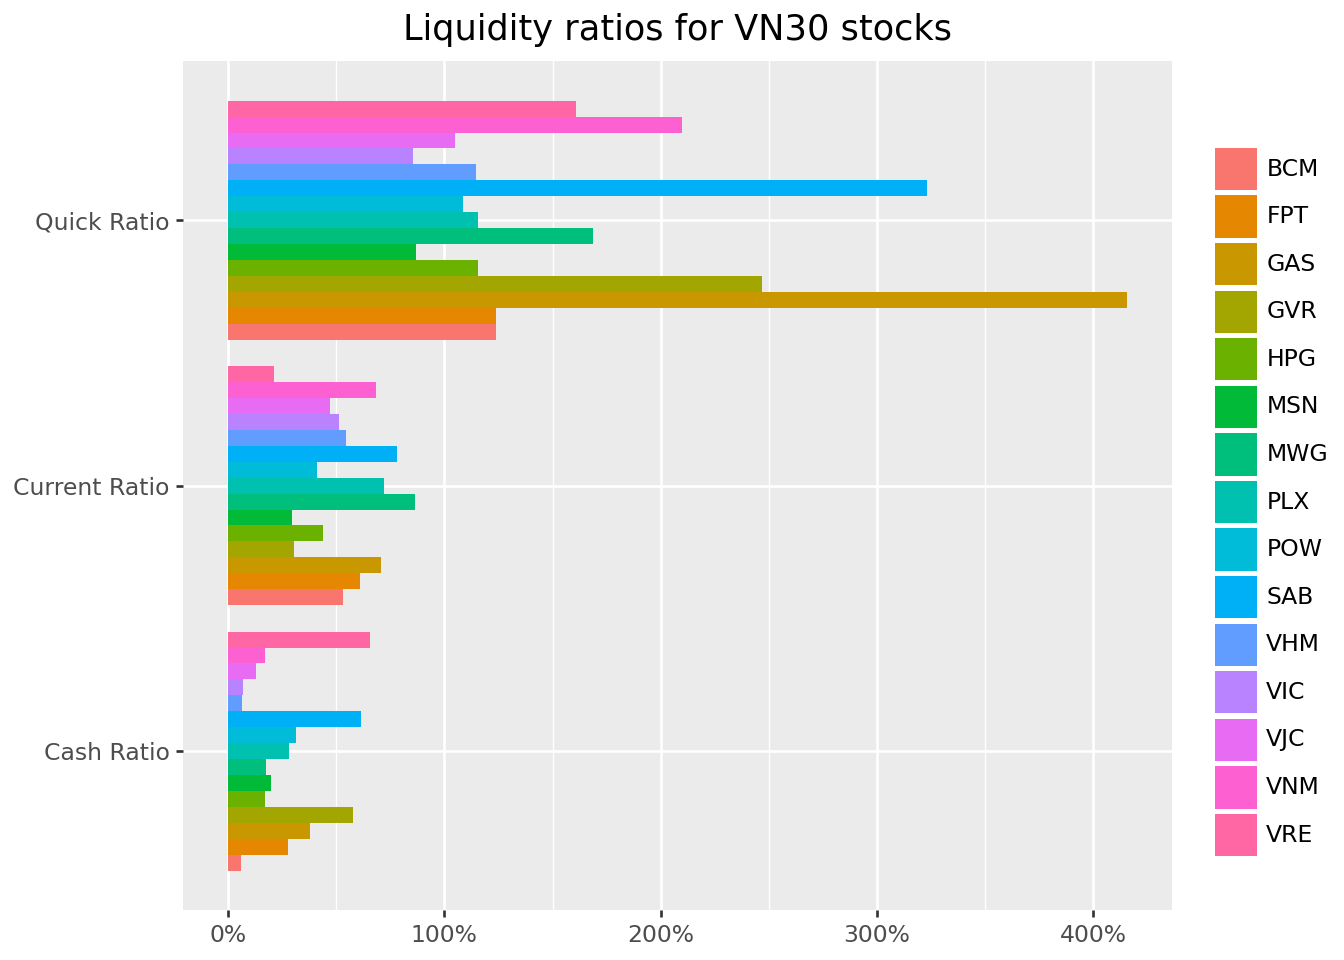

In [8]:
#| label: fig-409
#| fig-cap: Liquidity ratios are based on financial statements.
#| fig-alt: 'Title: Liquidity ratios for VN30 stocks. The figure shows a bar chart of liquidity ratios.'
liquidity_ratios = (balance_sheet_statements
  .query("year == 2023 & label.notna()")
  .get(["symbol", "current_ratio", "quick_ratio", "cash_ratio"])
  .melt(id_vars=["symbol"], var_name="name", value_name="value")
  .assign(
    name=lambda x: x["name"].str.replace("_", " ").str.title()
  )
)

liquidity_ratios_figure = (
  ggplot(
    liquidity_ratios, 
    aes(y="value", x="name", fill="symbol")
  )
  + geom_col(position="dodge")
  + coord_flip()
  + scale_y_continuous(labels=percent_format())
  + labs(
      x="", y="", fill="",
      title="Liquidity ratios for VN30 stocks"
    )
)
liquidity_ratios_figure.show()

In [9]:
balance_sheet_statements = balance_sheet_statements.assign(
  debt_to_equity=lambda x: x["total_debt"] / x["total_equity"],
  debt_to_asset=lambda x: x["total_debt"] / x["at"]
)


income_statements = (comp_vn30
  .assign(
    year=lambda x: x["year"].astype(int),
    # Handle zero interest expense to avoid infinity
    interest_coverage=lambda x: np.where(
        x["cfo_interest_expense"] > 0, 
         # The is_net_business_profit field captures the core profitability of a company's business activities before accounting for "other" non-core incomes and expenses, and before corporate income tax.
        x["is_net_business_profit"] / x["cfo_interest_expense"], 
        np.nan # Use np.nan so these points are safely ignored in plots
    ),
    label=lambda x: np.where(x["symbol"].isin(vn30_symbols), x["symbol"], np.nan)
  )
)

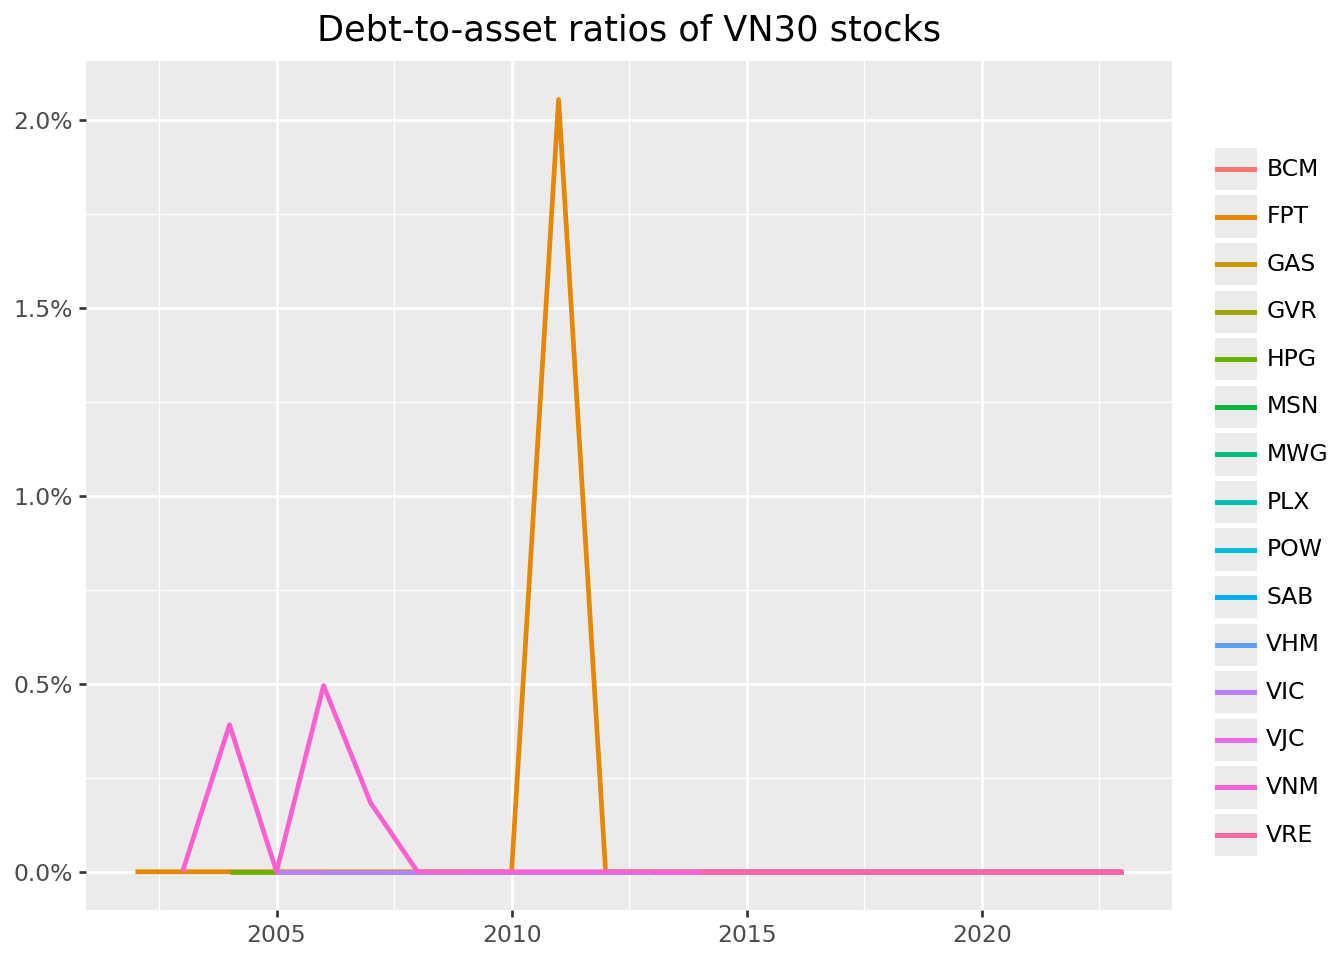

In [10]:
#| label: fig-410
#| fig-cap: Debt-to-asset ratios are based on financial statements.
#| fig-alt: 'Title: Debt-to-asset ratios of VN30 stocks. The figure shows a line chart with years on the horizontal axis and debt-to-asset ratios on the vertical axis.'
debt_to_asset = (balance_sheet_statements
  .query("symbol in @vn30_symbols")
)

debt_to_asset_figure = (
  ggplot(
    debt_to_asset,
    aes(x="year", y="debt_to_asset", color="symbol")
  )
  + geom_line(size=1)
  + scale_y_continuous(labels=percent_format())
  + labs(
      x="", y="", color="",
      title="Debt-to-asset ratios of VN30 stocks"
    ) 
)
debt_to_asset_figure.show()

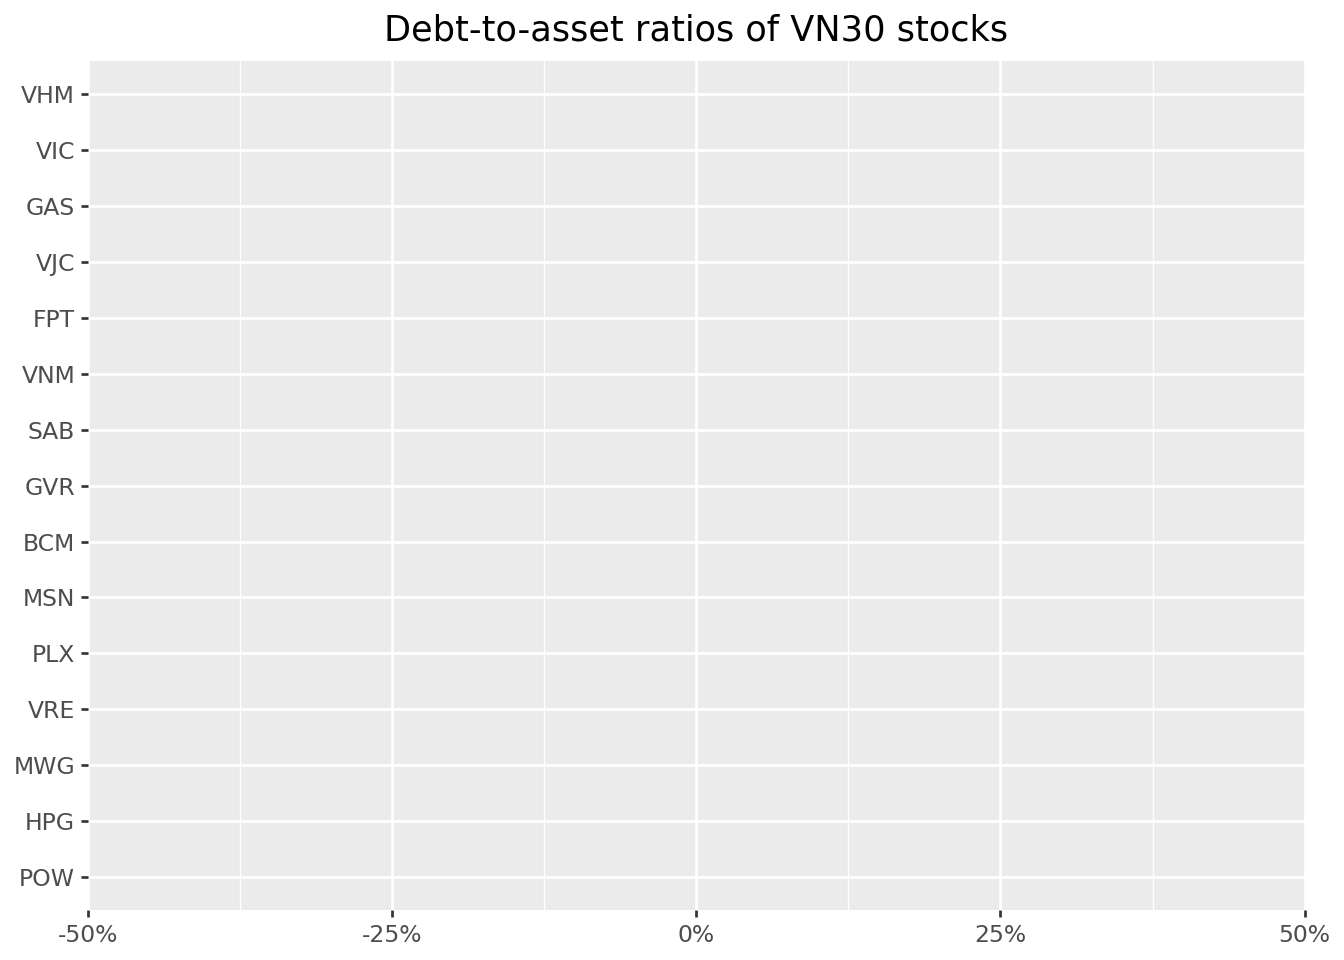

In [11]:
#| label: fig-411
#| fig-cap: Debt-to-asset ratios are based on financial statements.
#| fig-alt: 'Title: Debt-to-asset ratios of VN30 stocks. The figure shows a bar chart with debt-to-asset ratios on the horizontal and corresponding symbols on the vertical axis.'
debt_to_asset_comparison = (balance_sheet_statements
  .query("year == 2023")
)

debt_to_asset_comparison["symbol"] = pd.Categorical(
  debt_to_asset_comparison["symbol"],
  categories=debt_to_asset_comparison.sort_values("debt_to_asset")["symbol"],
  ordered=True
)

debt_to_asset_comparison_figure = (
  ggplot(
    debt_to_asset_comparison,
    aes(y="debt_to_asset", x="symbol", fill="label")
  )
  + geom_col()
  + coord_flip()
  + scale_y_continuous(labels=percent_format())
  + labs(
      x="", y="", fill="",
      title="Debt-to-asset ratios of VN30 stocks"
    ) 
  + theme(legend_position="none")
)
debt_to_asset_comparison_figure.show()

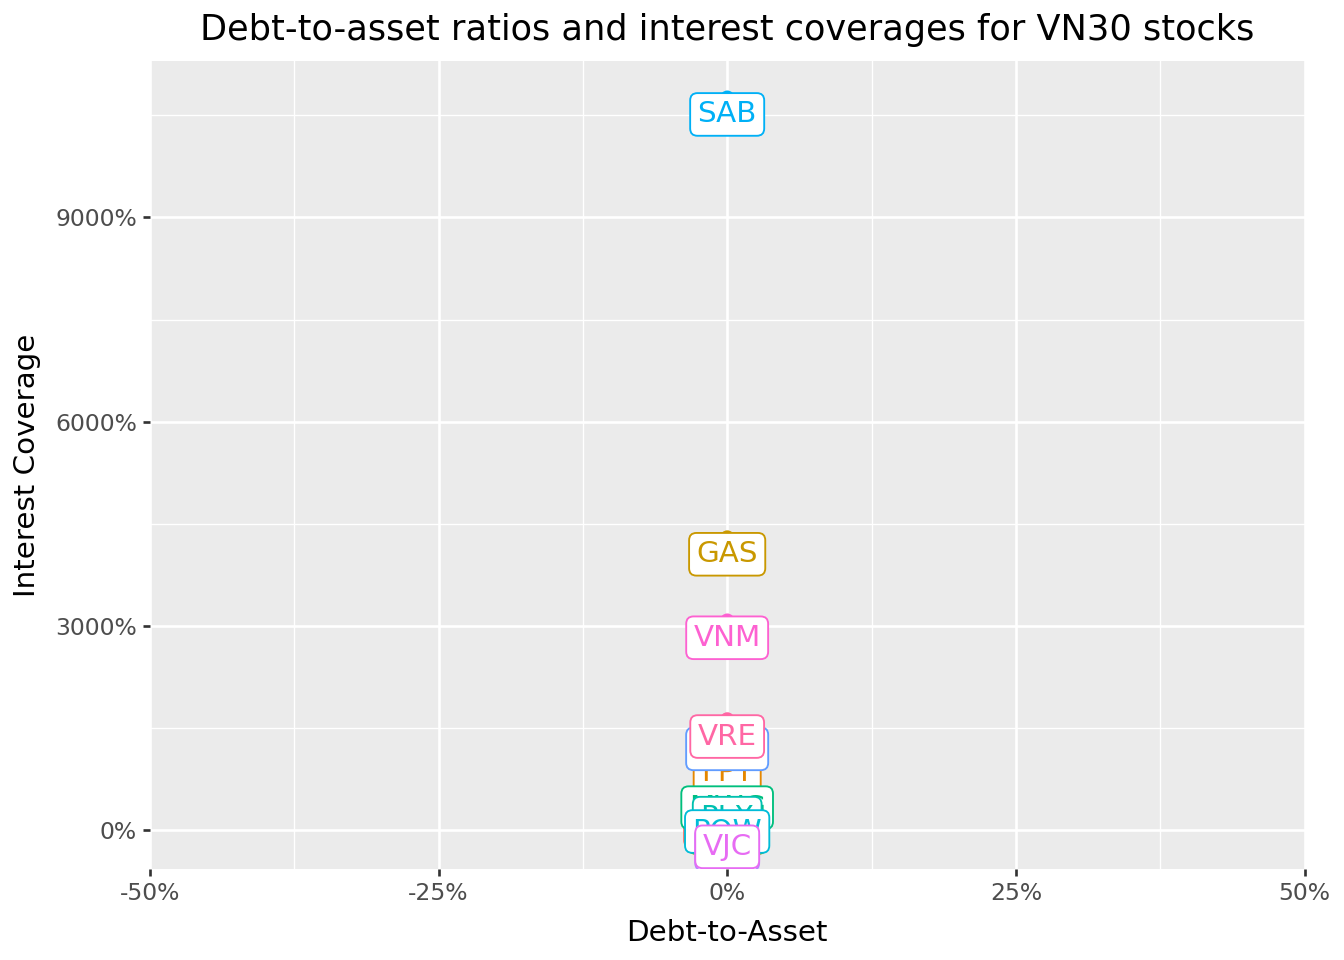

In [12]:
#| label: fig-412
#| fig-cap: Debt-to-asset ratios and interest coverages are based on financial statements.
#| fig-alt: 'Title: Debt-to-asset ratios and interest coverages for selected stocks. The figure shows a scatter plot with debt-to-asset on the horizontal and interest coverage on the vertical axis.'
interest_coverage = (income_statements
  .query("year == 2023")
  .get(["symbol", "year", "interest_coverage"])
  .merge(balance_sheet_statements, on=["symbol", "year"], how="left")
)

interest_coverage_figure = (
  ggplot(
    interest_coverage,
    aes(x="debt_to_asset", y="interest_coverage", color="label")
  ) 
  + geom_point(size=2)
  + geom_label(aes(label="label"), adjust_text={"arrowprops": {"arrowstyle": "-"}})
  + scale_x_continuous(labels=percent_format())
  + scale_y_continuous(labels=percent_format())
  
  + labs(
      x="Debt-to-Asset", y="Interest Coverage",
      title="Debt-to-asset ratios and interest coverages for VN30 stocks"
    )
  + theme(legend_position="none")
)
interest_coverage_figure.show()

In [13]:
combined_statements = (balance_sheet_statements
  .get(
    ["symbol", "year", "label", "current_ratio", "quick_ratio", 
     "cash_ratio", "debt_to_equity", "debt_to_asset", "total_asset", 
     "total_equity"]
  )
  .merge(
    (income_statements
      .get(["symbol", "year", "interest_coverage", "is_revenue", 
            "is_cogs", "selling_general_and_administrative_expenses", 
            "is_interest_expense","is_gross_profit", "is_eat"])
    ),
    on=["symbol", "year"],
    how="left"
  )
  .merge(
    (comp_vn30
      .assign(year=lambda x: x["year"].astype(int))
      .get(["symbol", "year", "ca_total_inventory", "ca_acc_receiv"])
    ),
    on=["symbol", "year"],
    how="left"
  )
)

combined_statements = (combined_statements
  .assign(
    asset_turnover=lambda x: x["is_revenue"] / x["total_asset"],
    inventory_turnover=lambda x: x["is_cogs"] / x["ca_total_inventory"],
    receivables_turnover=lambda x: x["is_revenue"] / x["ca_acc_receiv"]
  )
)

In [14]:
combined_statements = combined_statements.assign(
  gross_margin=lambda x: x["is_gross_profit"] / x["is_revenue"],
  profit_margin=lambda x: x["is_eat"] / x["is_revenue"],
  after_tax_roe=lambda x: x["is_eat"] / x["total_equity"]
)

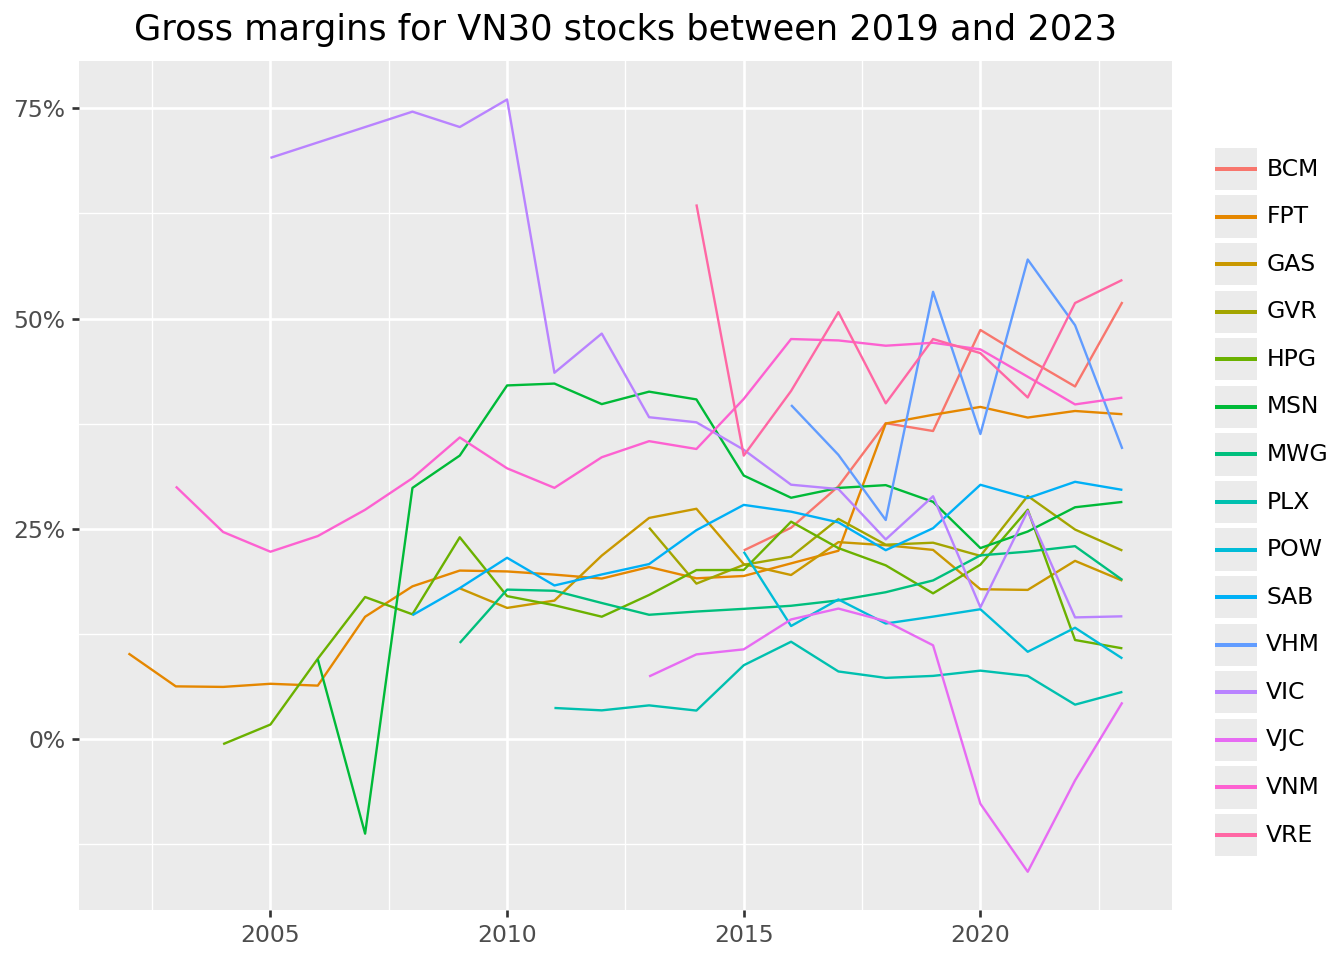

In [15]:
#| label: fig-413
#| fig-cap: Gross margins are based on financial statements.
#| fig-alt: 'Title: Gross margins for VN30 stocks between 2019 and 2023. The figure shows a line chart with years on the horizontal axis and gross margins on the vertical axis.'
gross_margins = (combined_statements
  .query("symbol in @vn30_symbols")
)
  
gross_margins_figure = (
  ggplot(
    gross_margins,
    aes(x="year", y="gross_margin", color="symbol")
  )
  + geom_line()
  + scale_y_continuous(labels=percent_format())
  + labs(
      x="", y="", color="",
      title="Gross margins for VN30 stocks between 2019 and 2023"
  )
)
gross_margins_figure.show()

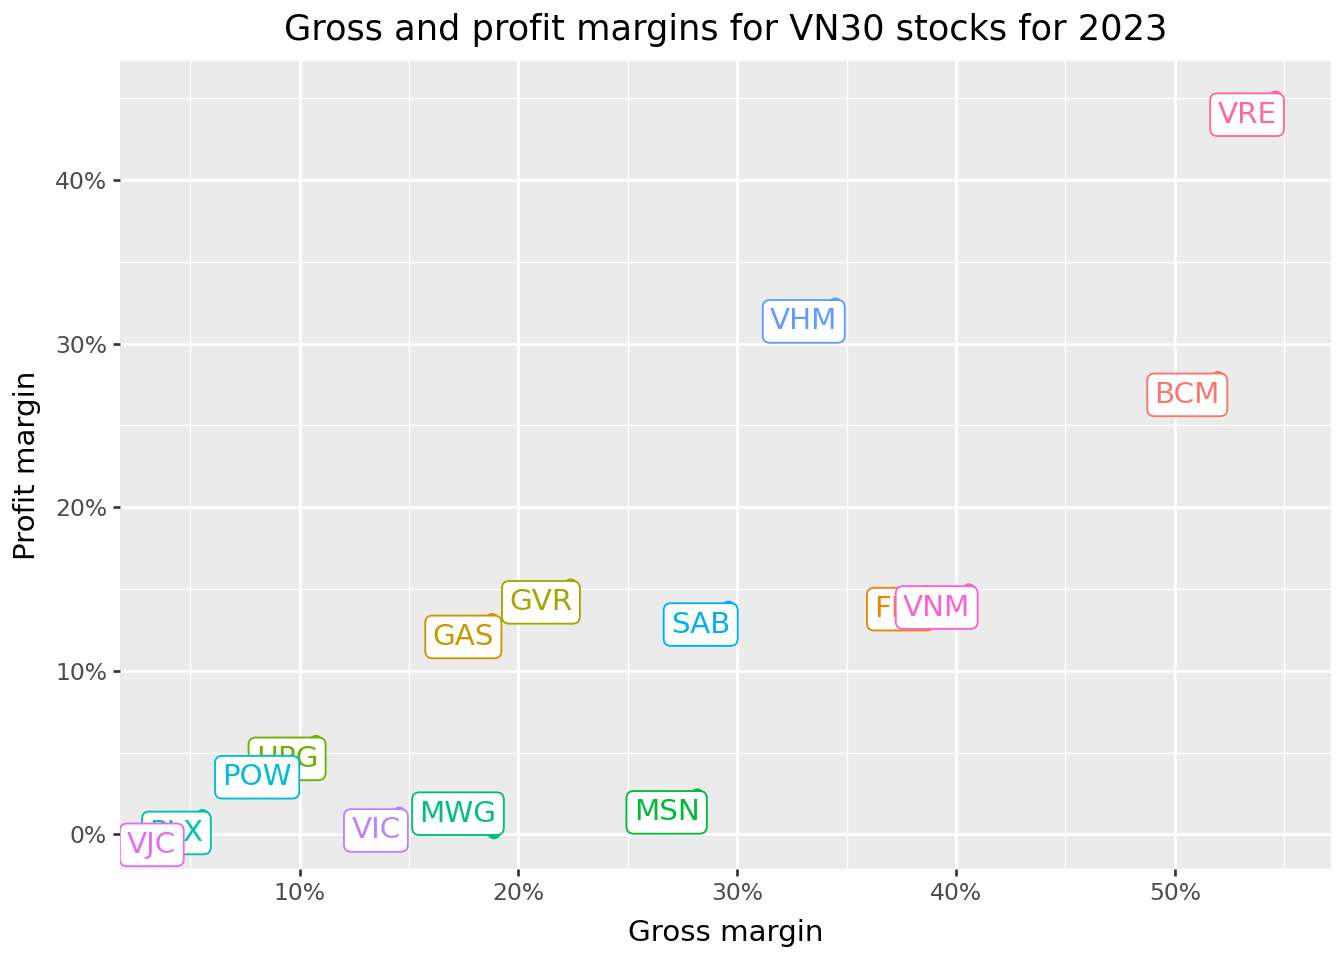

In [16]:
#| label: fig-414
#| fig-cap: Gross and profit margins are based on financial statements.
#| fig-alt: 'Title: Gross and profit margins for VN30 stocks for 2023. The figure shows a scatter plot with gross margins on the horizontal and profit margins on the vertical axis.'
profit_margins = (combined_statements
  .query("year == 2023")
)

profit_margins_figure = (
  ggplot(
    profit_margins,
    aes(x="gross_margin", y="profit_margin", color="label")
  )
  + geom_point(size=2)
  + geom_label(
      aes(label="label"), 
      adjust_text={"arrowprops": {"arrowstyle": "-"}}
    )
  + scale_x_continuous(labels=percent_format())
  + scale_y_continuous(labels=percent_format()) 
  
  + labs(
      x="Gross margin", y="Profit margin",
      title="Gross and profit margins for VN30 stocks for 2023"
    )
  + theme(legend_position = "none")
)
profit_margins_figure.show()

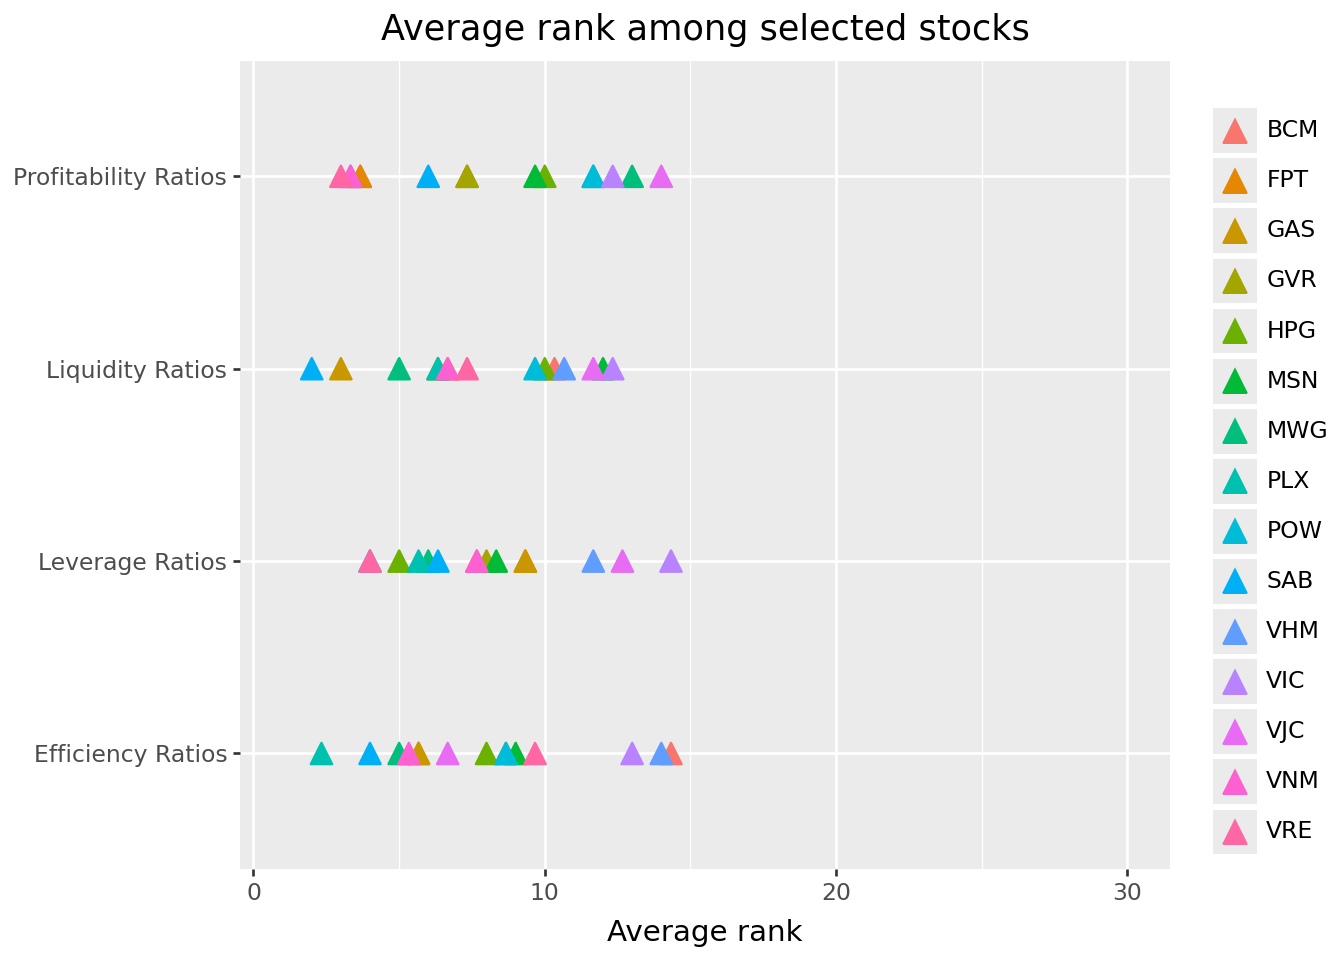

In [17]:
#| label: fig-415
#| fig-cap: Ranks are based on financial statements.
#| fig-alt: 'Title: Rank in financial ratio categories for selected stocks. The figure shows a scatter plot with ranks for selected stocks on the horizontal and categories of financial ratios on the vertical axis.'
financial_ratios = (combined_statements
  .query("year == 2023")
  .filter(
    items=["symbol"] + [
      col for col in combined_statements.columns 
      if any(x in col for x in ["ratio", "margin", "roe", "_to_", "turnover", "interest_coverage"])
    ]
  )
  .melt(id_vars=["symbol"], var_name="name", value_name="value")
  .assign(
    type=lambda x: np.select(
        [
            x["name"].isin(["current_ratio", "quick_ratio", "cash_ratio"]),
            x["name"].isin(["debt_to_equity", "debt_to_asset", "interest_coverage"]),
            x["name"].isin(["asset_turnover", "inventory_turnover", "receivables_turnover"]),
            x["name"].isin(["gross_margin", "profit_margin", "after_tax_roe"]),
        ],
        [
            "Liquidity Ratios",
            "Leverage Ratios",
            "Efficiency Ratios",
            "Profitability Ratios"
        ],
        default="Other"
    )
  )
)

financial_ratios["rank"] = (financial_ratios
  .sort_values(["type", "name", "value"], ascending=[True, True, False])
  .groupby(["type", "name"])
  .cumcount() + 1
)

final_ranks = (financial_ratios
  .groupby(["symbol", "type"], as_index=False)
  .agg(rank=("rank", "mean"))
  .query("symbol in @vn30_symbols")
)

final_ranks_figure = (
  ggplot(
    final_ranks,
    aes(x="rank", y="type", color="symbol")
  )
  + geom_point(shape="^", size=4)
  
  + labs(
      x="Average rank", y="", color="",
      title="Average rank among selected stocks"
  )
  + coord_cartesian(xlim=[1, 30])
)
final_ranks_figure.show()

In [18]:
prices_monthly = pd.read_sql_query(
    sql="SELECT * FROM prices_monthly",
    con=tidy_finance,
    parse_dates={"datadate"}
)
prices_monthly.head(3)

,symbol,date,#,id,adj_ratio,average_price,basic_price,buy_count,buy_vol_foreign,buy_val_foreigh,...,vol_putth,volume,year,adjusted_close,ret,shrout,mktcap,mktcap_lag,risk_free,ret_excess
0,A32,2018-11-30 00:00:00,2186706.0,2186706.0,1.72102,32.0,32.0,0.0,0.0,0.0,...,0.0,0.0,2018.0,55.072640,0.0,6.800000e+06,217.60,176.12,0.003333,-0.003333
1,A32,2018-12-31 00:00:00,2186726.0,2186726.0,1.72102,30.2,30.2,0.0,0.0,0.0,...,0.0,0.0,2018.0,51.974804,0.0,6.800000e+06,205.36,217.60,0.003333,-0.003333
2,A32,2019-01-31 00:00:00,2186748.0,2186748.0,1.64034,30.5,30.5,0.0,0.0,0.0,...,0.0,0.0,2019.0,50.030370,0.0,6.800000e+06,207.40,205.36,0.003333,-0.003333


In [19]:
# Create a filtered price table first to keep the chain clean
prices_december = (prices_monthly
  .assign(date=lambda x: pd.to_datetime(x["date"])) # Convert to datetime
  .query("date.dt.month == 12") # Now .dt will work
)
prices_december.head(3)

,symbol,date,#,id,adj_ratio,average_price,basic_price,buy_count,buy_vol_foreign,buy_val_foreigh,...,vol_putth,volume,year,adjusted_close,ret,shrout,mktcap,mktcap_lag,risk_free,ret_excess
1,A32,2018-12-31,2186726.0,2186726.0,1.72102,30.2,30.2,0.0,0.0,0.0,...,0.0,0.0,2018.0,51.974804,0.000000,6.800000e+06,205.36,217.60,0.003333,-0.003333
13,A32,2019-12-31,2186976.0,2186976.0,1.51425,28.0,28.0,0.0,0.0,0.0,...,0.0,0.0,2019.0,42.399000,0.000000,6.800000e+06,190.40,190.40,0.003333,-0.003333
25,A32,2020-12-31,2187228.0,2187228.0,1.47571,34.5,34.8,4.0,0.0,0.0,...,0.0,200.0,2020.0,50.911995,-0.008621,6.800000e+06,234.60,214.88,0.003333,-0.011954


In [20]:
combined_statements_ff = (combined_statements
  .query("year == 2023")
  .merge(prices_december, on=["symbol", "year"], how="left") 
  .merge(
    (balance_sheet_statements
      .query("year == 2022")
      .get(["symbol", "total_asset"])
      .rename(columns={"total_asset": "total_assets_lag"})
    ),
    on="symbol", how="left"
  )
  .assign(
    size=lambda x: np.log(x["mktcap"]),
    book_to_market=lambda x: x["total_equity"] / x["mktcap"],
    operating_profitability=lambda x: (
        (x["is_revenue"] - x["is_cogs"] - 
         x["selling_general_and_administrative_expenses"] - 
         x["is_interest_expense"]) / x["total_equity"]
    ),
    investment=lambda x: x["total_asset"] / x["total_assets_lag"] - 1
  )
)

# Display the result to verify the column names
combined_statements_ff.head()

,symbol,year,label,current_ratio,quick_ratio,cash_ratio,debt_to_equity,debt_to_asset,total_asset,total_equity,...,shrout,mktcap,mktcap_lag,risk_free,ret_excess,total_assets_lag,size,book_to_market,operating_profitability,investment
0,POW,2023,POW,0.412750,1.084255,0.315089,0.0,0.0,7.036209e+13,3.411943e+13,...,2.341872e+09,26346.055367,26346.055367,0.003333,-0.003333,5.684324e+13,10.179074,1.295049e+09,0.025539,0.237827
1,HPG,2023,HPG,0.440490,1.156655,0.171324,0.0,0.0,1.877826e+14,1.028364e+14,...,5.814786e+09,162523.260217,154382.560242,0.003333,-0.003333,1.703355e+14,11.998576,6.327489e+08,0.072798,0.102428
2,MWG,2023,MWG,0.864237,1.688604,0.174408,0.0,0.0,6.011124e+13,2.335956e+13,...,1.462941e+09,62613.896064,56323.247628,0.003333,-0.009141,5.583410e+13,11.044743,3.730731e+08,-0.002443,0.076604
3,VRE,2023,VRE,0.210612,1.607152,0.656788,0.0,0.0,4.765373e+13,3.782685e+13,...,2.272318e+09,52945.018930,50218.236839,0.003333,-0.011844,4.270109e+13,10.877009,7.144554e+08,0.111972,0.115984
4,PLX,2023,PLX,0.719253,1.153971,0.282885,0.0,0.0,7.967562e+13,2.920211e+13,...,1.270592e+09,43835.432170,44597.787512,0.003333,-0.003333,7.447562e+13,10.688198,6.661759e+08,0.047238,0.069822


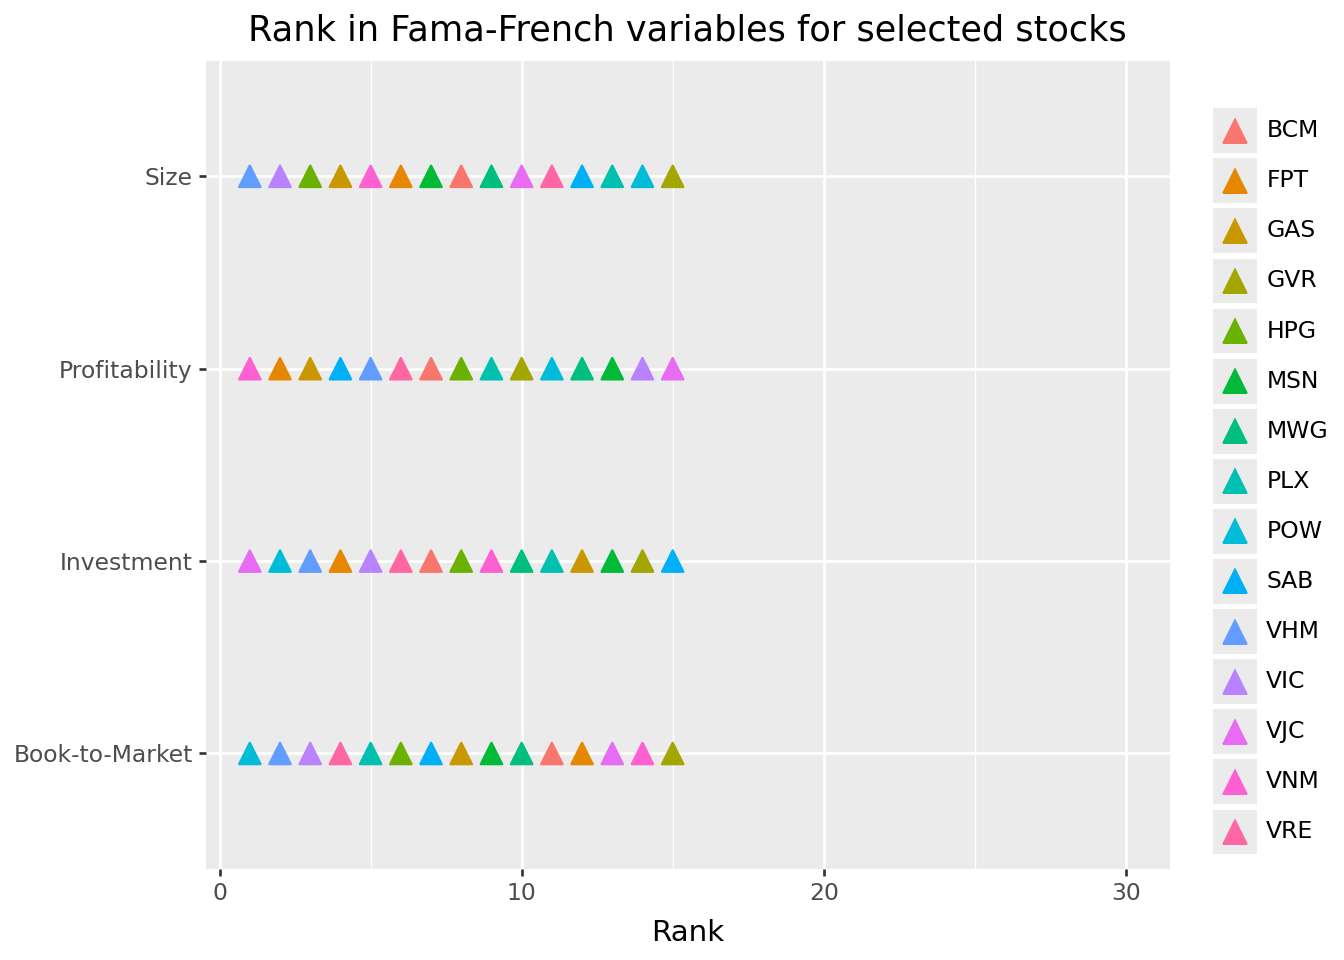

In [21]:
#| label: fig-416
#| fig-cap: Ranks are based on financial statements and historical market capitalization.
#| fig-alt: 'Title: Rank in Fama-French variables for selected stocks. The figure shows a scatter plot with ranks for selected stocks on the horizontal and Fama-French variables on the vertical axis.'
factors_ranks = (combined_statements_ff
  .get(["symbol", "size", "book_to_market", "operating_profitability", "investment"])
  .rename(columns={
    "size": "Size",
    "book_to_market": "Book-to-Market",
    "operating_profitability": "Profitability",
    "investment": "Investment"
  })
  .melt(id_vars=["symbol"], var_name="name", value_name="value")
  .assign(
    rank=lambda x: (
      x.sort_values(["name", "value"], ascending=[True, False])
      .groupby("name")
      .cumcount() + 1
      )
  )
  .query("symbol in @vn30_symbols")
)

factors_ranks_figure = (
  ggplot(
    factors_ranks,
    aes(x="rank", y="name", color="symbol")
  )
  + geom_point(shape="^", size=4)
  
  + labs(
      x="Rank", y="", color="",
      title="Rank in Fama-French variables for selected stocks"
  )
  + coord_cartesian(xlim=[1, 30])
)

factors_ranks_figure.show()